In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
import seaborn as sns

In [2]:
data = pd.read_csv('BCICIV_2a_all_patients.csv')

In [3]:
print("Dataset Info:")
data.info()
print("\nSample Data:")
print(data.head())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 492048 entries, 0 to 492047
Data columns (total 26 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   patient  492048 non-null  int64  
 1   time     492048 non-null  float64
 2   label    492048 non-null  object 
 3   epoch    492048 non-null  int64  
 4   EEG-Fz   492048 non-null  float64
 5   EEG-0    492048 non-null  float64
 6   EEG-1    492048 non-null  float64
 7   EEG-2    492048 non-null  float64
 8   EEG-3    492048 non-null  float64
 9   EEG-4    492048 non-null  float64
 10  EEG-5    492048 non-null  float64
 11  EEG-C3   492048 non-null  float64
 12  EEG-6    492048 non-null  float64
 13  EEG-Cz   492048 non-null  float64
 14  EEG-7    492048 non-null  float64
 15  EEG-C4   492048 non-null  float64
 16  EEG-8    492048 non-null  float64
 17  EEG-9    492048 non-null  float64
 18  EEG-10   492048 non-null  float64
 19  EEG-11   492048 non-null  float64
 20  EEG-12   492

In [16]:
df=data[data["patient"]==1]
df

,patient,time,label,epoch,EEG-Fz,EEG-0,EEG-1,EEG-2,EEG-3,EEG-4,...,EEG-8,EEG-9,EEG-10,EEG-11,EEG-12,EEG-13,EEG-14,EEG-Pz,EEG-15,EEG-16
0,1,-0.100,tongue,8,-1.681412,2.245496,-0.158350,1.163765,-1.523659,-0.575267,...,0.758116,3.441785,0.305517,1.137473,-1.275763,-2.898359,0.656704,-2.010063,-1.613804,-1.942455
1,1,-0.096,tongue,8,0.420417,0.587559,1.650510,0.970672,1.505904,0.891796,...,1.541586,-0.071620,0.258909,-1.448198,0.142472,-1.968405,-1.733655,-2.935578,-3.125256,-4.674610
2,1,-0.092,tongue,8,0.551365,1.499758,0.121302,2.859433,2.613414,4.636026,...,2.649097,-2.137938,-1.612096,-1.610218,-0.410173,-0.274957,-4.776535,-5.099551,-2.798995,-5.862021
3,1,-0.088,tongue,8,3.054916,-1.807238,1.843603,2.286812,5.995872,6.651295,...,6.031554,-5.249621,-2.672998,-3.452370,0.189081,1.593829,-6.081577,-5.476860,-2.932163,-6.874095
4,1,-0.084,tongue,8,2.506710,-2.453101,0.221178,0.127278,4.519931,6.249573,...,7.827097,-5.309546,-2.488783,-3.707608,1.447515,4.268278,-4.383690,-4.218426,-1.331932,-5.322692
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57883,1,0.684,left,602,-22.074154,-11.489719,-9.314989,-8.518715,-6.629442,-10.866221,...,-2.208619,3.177499,5.344716,3.831044,6.110942,6.047090,10.841636,13.959124,14.028611,19.901132
57884,1,0.688,left,602,-24.568827,-12.128923,-11.760834,-9.890342,-8.587006,-11.798394,...,-4.068527,4.198450,6.219184,6.805121,6.594785,6.726245,11.667276,14.540623,14.317140,20.970911
57885,1,0.692,left,602,-25.776214,-8.892950,-10.233846,-10.316478,-10.233846,-11.785078,...,-4.934116,6.067236,6.623125,6.525469,5.436226,4.005187,12.950124,14.016830,12.670301,18.347509
57886,1,0.696,left,602,-22.473657,-6.762268,-7.077773,-9.943609,-9.323867,-14.097755,...,-6.270231,8.393230,8.558495,6.117088,3.270033,-0.260616,12.492915,13.217825,9.869342,17.060222


In [17]:
signal_columns = ['EEG-Fz', 'EEG-0', 'EEG-1', 'EEG-2', 'EEG-3', 'EEG-4', 'EEG-5', 'EEG-C3',
                  'EEG-6', 'EEG-Cz', 'EEG-7', 'EEG-C4', 'EEG-8', 'EEG-9', 'EEG-10', 'EEG-11',
                  'EEG-12', 'EEG-13', 'EEG-14', 'EEG-Pz', 'EEG-15', 'EEG-16']
label_column = 'label'

In [18]:
X = df[signal_columns].values  # Shape: (samples, channels)
y = df[label_column].values

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [20]:
label_mapping = {label: idx for idx, label in enumerate(np.unique(y))}
y = np.vectorize(label_mapping.get)(y)
y = to_categorical(y)

In [21]:
num_samples = X.shape[0]
num_channels = len(signal_columns)
timepoints = 1  

X = X.reshape(num_samples, num_channels, timepoints)

scaler = StandardScaler()
X = scaler.fit_transform(X.reshape(-1, X.shape[-1])).reshape(X.shape)  # Standardize each channel



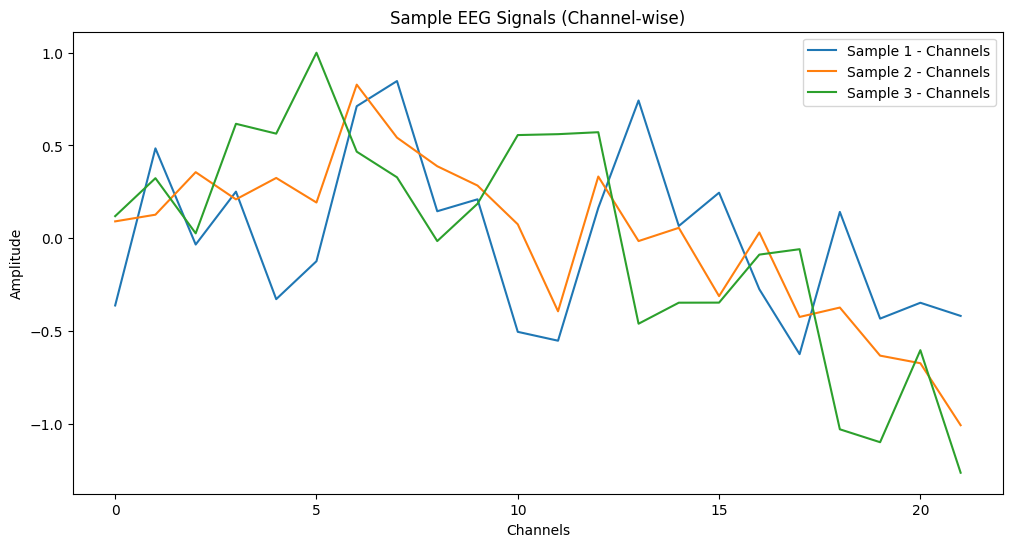

In [22]:
# Visualize some EEG signals for understanding
plt.figure(figsize=(12, 6))
for i in range(3):  # Displaying 3 samples
    plt.plot(X[i, :, 0], label=f'Sample {i+1} - Channels')
plt.title("Sample EEG Signals (Channel-wise)")
plt.xlabel("Channels")
plt.ylabel("Amplitude")
plt.legend()
plt.show()

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
from tensorflow.keras.layers import BatchNormalization, GlobalAveragePooling2D

# Updated CNN Model
model = Sequential([
    Conv2D(64, (3, 1), activation='relu', input_shape=(len(signal_columns), 1, 1)),
    BatchNormalization(),
    MaxPooling2D((2, 1)),
    Dropout(0.25),

    Conv2D(128, (5, 1), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 1)),
    Dropout(0.25),

    Conv2D(256, (3, 1), activation='relu'),  # Reduced kernel size here
    BatchNormalization(),
    
    GlobalAveragePooling2D(),
    
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(y.shape[1], activation='softmax')
])
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the Model with Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=64, callbacks=[early_stopping])

Epoch 1/50
579/579 [==============================] - 5s 7ms/step - loss: 1.4942 - accuracy: 0.2848 - val_loss: 1.3561 - val_accuracy: 0.3196
Epoch 2/50
579/579 [==============================] - 4s 6ms/step - loss: 1.3693 - accuracy: 0.3131 - val_loss: 1.3323 - val_accuracy: 0.3425
Epoch 3/50
579/579 [==============================] - 4s 6ms/step - loss: 1.3491 - accuracy: 0.3316 - val_loss: 1.3108 - val_accuracy: 0.3707
Epoch 4/50
579/579 [==============================] - 4s 6ms/step - loss: 1.3349 - accuracy: 0.3445 - val_loss: 1.3061 - val_accuracy: 0.3757
Epoch 5/50
579/579 [==============================] - 3s 6ms/step - loss: 1.3232 - accuracy: 0.3578 - val_loss: 1.2933 - val_accuracy: 0.3816
Epoch 6/50
579/579 [==============================] - 4s 6ms/step - loss: 1.3158 - accuracy: 0.3654 - val_loss: 1.2809 - val_accuracy: 0.3922
Epoch 7/50
579/579 [==============================] - 4s 6ms/step - loss: 1.3077 - accuracy: 0.3684 - val_loss: 1.2733 - val_accuracy: 0.3993
Epoch 

In [ ]:
model = Sequential([
    Conv2D(32, (3, 1), activation='relu', input_shape=(len(signal_columns), 1, 1)),
    MaxPooling2D((2, 1)),
    Dropout(0.25),
    Conv2D(64, (3, 1), activation='relu'),
    MaxPooling2D((2, 1)),
    Flatten(),
    Dense(128, activation='relu'),a
    Dropout(0.5),
    Dense(y.shape[1], activation='softmax')
])

c:\Users\Admin\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [47]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [48]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(X_train, y_train, validation_split=0.2, epochs=30, batch_size=32, callbacks=[early_stopping])

Epoch 1/30
9841/9841 ━━━━━━━━━━━━━━━━━━━━ 52s 5ms/step - accuracy: 0.2775 - loss: 1.3836 - val_accuracy: 0.2973 - val_loss: 1.3757
Epoch 2/30
9841/9841 ━━━━━━━━━━━━━━━━━━━━ 47s 5ms/step - accuracy: 0.2894 - loss: 1.3781 - val_accuracy: 0.2988 - val_loss: 1.3729
Epoch 3/30
9841/9841 ━━━━━━━━━━━━━━━━━━━━ 44s 4ms/step - accuracy: 0.2915 - loss: 1.3763 - val_accuracy: 0.3003 - val_loss: 1.3720
Epoch 4/30
9841/9841 ━━━━━━━━━━━━━━━━━━━━ 50s 5ms/step - accuracy: 0.2965 - loss: 1.3747 - val_accuracy: 0.3008 - val_loss: 1.3695
Epoch 5/30
9841/9841 ━━━━━━━━━━━━━━━━━━━━ 44s 4ms/step - accuracy: 0.2944 - loss: 1.3741 - val_accuracy: 0.3021 - val_loss: 1.3702
Epoch 6/30
9841/9841 ━━━━━━━━━━━━━━━━━━━━ 47s 5ms/step - accuracy: 0.2958 - loss: 1.3725 - val_accuracy: 0.3068 - val_loss: 1.3680
Epoch 7/30
9841/9841 ━━━━━━━━━━━━━━━━━━━━ 52s 5ms/step - accuracy: 0.2969 - loss: 1.3725 - val_accuracy: 0.3044 - val_loss: 1.3681
Epoch 8/30
9841/9841 ━━━━━━━━━━━━━━━━━━━━ 48s 5ms/step - accuracy: 0.2974 - loss: 1

In [26]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy}")

362/362 [==============================] - 1s 4ms/step - loss: 1.1221 - accuracy: 0.4950
Test accuracy: 0.4949904978275299


In [28]:
new_data = X_test[:5] 
print(new_data)
predictions = model.predict(new_data)
print(predictions)

predicted_classes = predictions.argmax(axis=1)
print(predicted_classes)

movement={0:"Hand Front",1:"Hand Back",2:"Bend",3:"Grab"}

for i in predicted_classes:
    print(movement[i])

[[[ 1.14957142]
  [-0.81560989]
  [ 0.67407207]
  [ 0.97541067]
  [ 1.49222257]
  [ 0.24353049]
  [-1.66494732]
  [-0.55882404]
  [ 0.11270741]
  [ 0.49910126]
  [ 0.62141882]
  [-0.41787534]
  [-2.77309573]
  [-0.24492967]
  [ 0.62101379]
  [ 0.32939579]
  [ 0.37232844]
  [-0.36319697]
  [ 0.25284606]
  [ 0.36949326]
  [-0.47700899]
  [-0.39762409]]

 [[ 1.54758212]
  [ 1.18791992]
  [ 0.19763379]
  [ 0.54717037]
  [ 0.60792412]
  [ 1.33291887]
  [ 1.6460032 ]
  [ 0.57633217]
  [-0.72015286]
  [-1.04457789]
  [-0.25275401]
  [ 0.85782455]
  [ 1.59294492]
  [ 0.41472719]
  [-1.12517787]
  [-1.24182507]
  [-1.04174272]
  [ 0.24502172]
  [-0.93036084]
  [-1.47349937]
  [-1.10330652]
  [-1.8206058 ]]

 [[ 0.32954307]
  [ 0.4060928 ]
  [ 0.69568567]
  [ 0.03508989]
  [ 0.43768475]
  [-0.68909481]
  [ 0.18211397]
  [ 0.24286772]
  [ 0.7106716 ]
  [ 0.22261647]
  [ 0.14566172]
  [-1.11153589]
  [-0.96856206]
  [-0.41124766]
  [ 0.24732299]
  [-0.20833013]
  [-0.17916833]
  [-0.40760243]
  [-

362/362 [==============================] - 1s 2ms/step


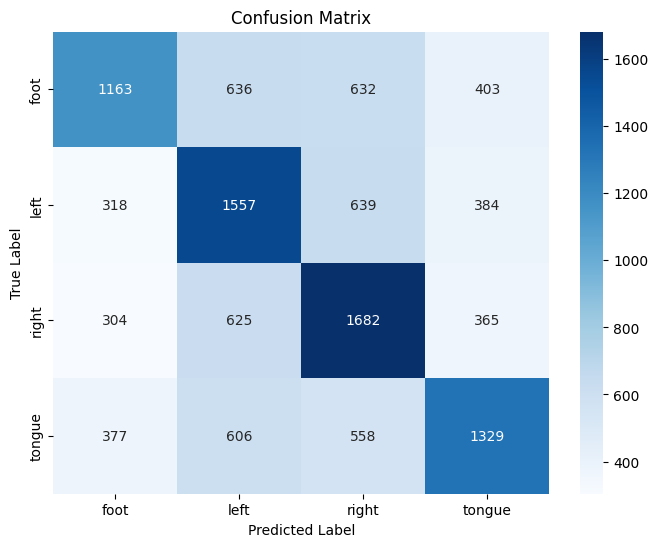

Classification Report:
              precision    recall  f1-score   support

        foot       0.54      0.41      0.47      2834
        left       0.45      0.54      0.49      2898
       right       0.48      0.57      0.52      2976
      tongue       0.54      0.46      0.50      2870

    accuracy                           0.49     11578
   macro avg       0.50      0.49      0.49     11578
weighted avg       0.50      0.49      0.49     11578



In [29]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred = np.argmax(model.predict(X_test), axis=1)
y_true = np.argmax(y_test, axis=1)


cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_mapping.keys(), yticklabels=label_mapping.keys())
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=label_mapping.keys()))

In [30]:
model.save('EEG.h5')